In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Overview of Belgian Companies by Sector


### General Overview

In [2]:
sector_nac_2025 = pd.read_csv('data\Entity-nace-by-sector-with-description.csv')

In [3]:
sector_nac_2025

,NaceCodeGroup,EntityCount,Description
0,47,239065,Commerce de détail
1,43,186269,Travaux de construction spécialisés
2,82,150687,"Activités de service de bureau, de soutien adm..."
3,70,144354,Activités des sièges sociaux et conseil de ges...
4,46,125921,Commerce de gros
...,...,...,...
75,99,430,Activités des organisations et organismes extr...
76,36,313,"Captage, traitement et distribution d’eau"
77,89,62,NaN
78,19,51,Cokéfaction et raffinage


<Axes: xlabel='NaceCodeGroup', ylabel='EntityCount'>

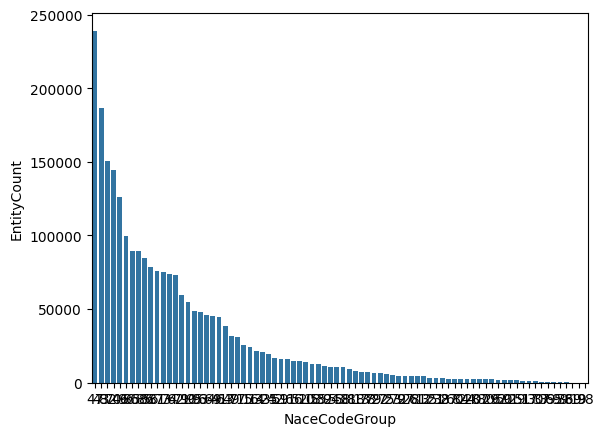

In [4]:
sector_nac_2025_sorted = sector_nac_2025.sort_values('EntityCount', ascending=False)

sns.barplot(data=sector_nac_2025_sorted, x='NaceCodeGroup', y='EntityCount',  order=sector_nac_2025_sorted['NaceCodeGroup'])  


In [5]:
top_ten_sectors = sector_nac_2025.head(10)

In [24]:
top_five_sectors = sector_nac_2025.head(5)

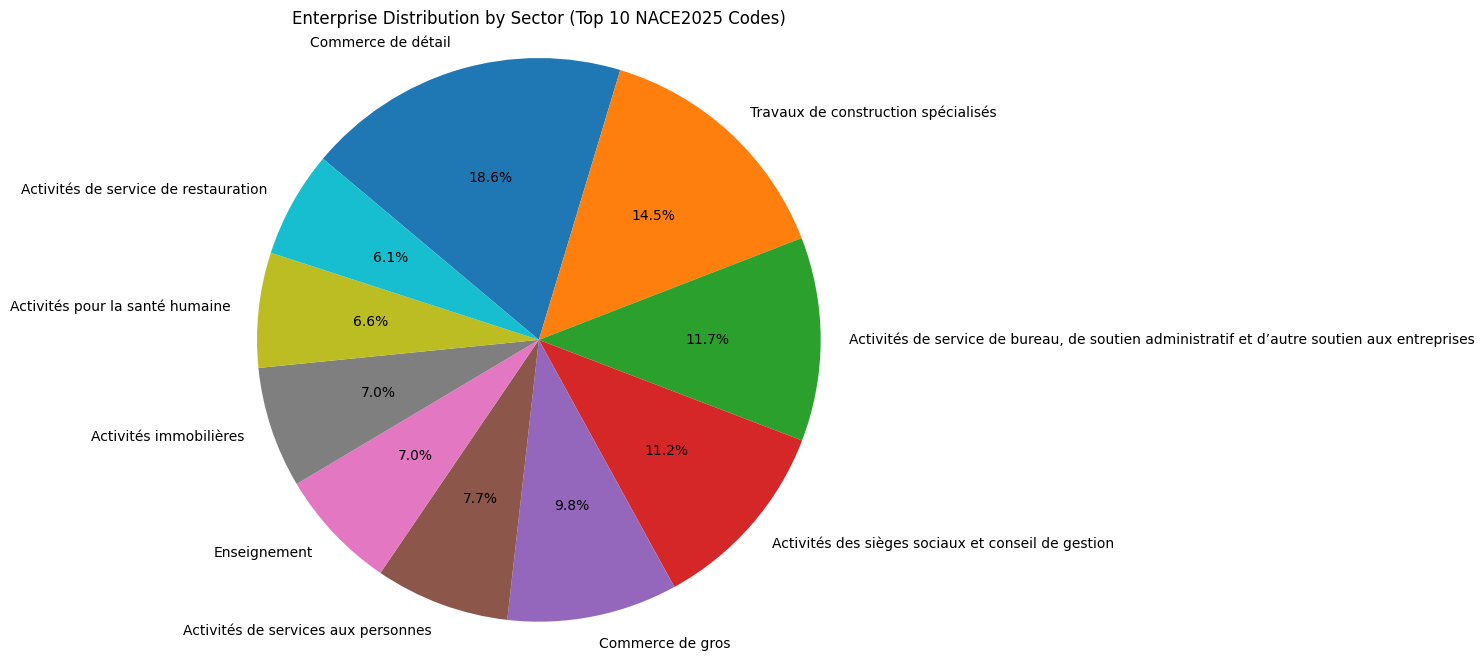

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(
    top_ten_sectors['EntityCount'],
    labels=top_ten_sectors['Description'],
    autopct='%1.1f%%',
    startangle=140,
    counterclock=False
)
plt.title('Enterprise Distribution by Sector -Top 10 economic activities')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

### Juridique Type of Belgian Companies by Sector

In [80]:
jur_codes = pd.read_csv('data/juridical_form_codes.csv')
jur_codes

,Code,Description
0,1,Société coopérative européenne
1,2,Organisme de financement de pensions
2,3,Unité TVA
3,6,Société coopérative à responsabilité illimitée
4,7,Société coopérative à responsabilité illimitée...
...,...,...
141,722,Association momentanée
142,723,Association de frais
143,724,Syndicat
144,790,Divers sans personnalité juridique


In [95]:
juridique = pd.read_csv('data/type-of-companies-by-sector-COMPLETE.csv')
juridique

,NaceCodeGroup,NaceDescription_FR,JuridicalForm,JuridicalForm_FR,EnterpriseCount
0,47,Commerce de détail,NaN,NaN,114590
1,70,Activités des sièges sociaux et conseil de ges...,610.0,NaN,85628
2,43,Travaux de construction spécialisés,NaN,NaN,85218
3,47,Commerce de détail,610.0,NaN,79464
4,96,Activités de services aux personnes,NaN,NaN,77904
...,...,...,...,...,...
2150,99,Activités des organisations et organismes extr...,26.0,NaN,1
2151,99,Activités des organisations et organismes extr...,29.0,NaN,1
2152,99,Activités des organisations et organismes extr...,51.0,NaN,1
2153,99,Activités des organisations et organismes extr...,411.0,NaN,1


In [96]:
jur_labeled = juridique.merge(
    jur_codes,
    left_on='JuridicalForm',
    right_on='Code',
    how='left'  
)

In [82]:
jur_labeled 

,NaceCodeGroup,NaceDescription_FR,JuridicalForm,JuridicalForm_FR,EnterpriseCount,Code,Description
0,47,Commerce de détail,NaN,NaN,114590,NaN,NaN
1,70,Activités des sièges sociaux et conseil de ges...,610.0,NaN,85628,610.0,Société à responsabilité limitée
2,43,Travaux de construction spécialisés,NaN,NaN,85218,NaN,NaN
3,47,Commerce de détail,610.0,NaN,79464,610.0,Société à responsabilité limitée
4,96,Activités de services aux personnes,NaN,NaN,77904,NaN,NaN
...,...,...,...,...,...,...,...
2150,99,Activités des organisations et organismes extr...,26.0,NaN,1,26.0,Fondation privée
2151,99,Activités des organisations et organismes extr...,29.0,NaN,1,29.0,Fondation d'utilité publique
2152,99,Activités des organisations et organismes extr...,51.0,NaN,1,51.0,Autre forme de droit privé avec personnalité j...
2153,99,Activités des organisations et organismes extr...,411.0,NaN,1,411.0,Ville / commune


In [97]:
jur_labeled .fillna(value = 'Unknown', inplace = True)
jur_labeled 

C:\Users\herms\AppData\Local\Temp\ipykernel_32164\1176641504.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  jur_labeled .fillna(value = 'Unknown', inplace = True)


,NaceCodeGroup,NaceDescription_FR,JuridicalForm,JuridicalForm_FR,EnterpriseCount,Code,Description
0,47,Commerce de détail,Unknown,Unknown,114590,Unknown,Unknown
1,70,Activités des sièges sociaux et conseil de ges...,610.0,Unknown,85628,610.0,Société à responsabilité limitée
2,43,Travaux de construction spécialisés,Unknown,Unknown,85218,Unknown,Unknown
3,47,Commerce de détail,610.0,Unknown,79464,610.0,Société à responsabilité limitée
4,96,Activités de services aux personnes,Unknown,Unknown,77904,Unknown,Unknown
...,...,...,...,...,...,...,...
2150,99,Activités des organisations et organismes extr...,26.0,Unknown,1,26.0,Fondation privée
2151,99,Activités des organisations et organismes extr...,29.0,Unknown,1,29.0,Fondation d'utilité publique
2152,99,Activités des organisations et organismes extr...,51.0,Unknown,1,51.0,Autre forme de droit privé avec personnalité j...
2153,99,Activités des organisations et organismes extr...,411.0,Unknown,1,411.0,Ville / commune


In [98]:
filtered_juridique = jur_labeled [jur_labeled['NaceCodeGroup'].isin(top_ten_sectors['NaceCodeGroup'])]

In [99]:
top_forms = filtered_juridique['Description'].value_counts().head(5).index
filtered_juridique = filtered_juridique[filtered_juridique['Description'].isin(top_forms)]


In [100]:
filtered_juridique

,NaceCodeGroup,NaceDescription_FR,JuridicalForm,JuridicalForm_FR,EnterpriseCount,Code,Description
0,47,Commerce de détail,Unknown,Unknown,114590,Unknown,Unknown
1,70,Activités des sièges sociaux et conseil de ges...,610.0,Unknown,85628,610.0,Société à responsabilité limitée
2,43,Travaux de construction spécialisés,Unknown,Unknown,85218,Unknown,Unknown
3,47,Commerce de détail,610.0,Unknown,79464,610.0,Société à responsabilité limitée
4,96,Activités de services aux personnes,Unknown,Unknown,77904,Unknown,Unknown
5,43,Travaux de construction spécialisés,610.0,Unknown,73103,610.0,Société à responsabilité limitée
6,82,"Activités de service de bureau, de soutien adm...",Unknown,Unknown,64024,Unknown,Unknown
7,82,"Activités de service de bureau, de soutien adm...",610.0,Unknown,57314,610.0,Société à responsabilité limitée
8,85,Enseignement,Unknown,Unknown,55839,Unknown,Unknown
9,46,Commerce de gros,610.0,Unknown,53422,610.0,Société à responsabilité limitée


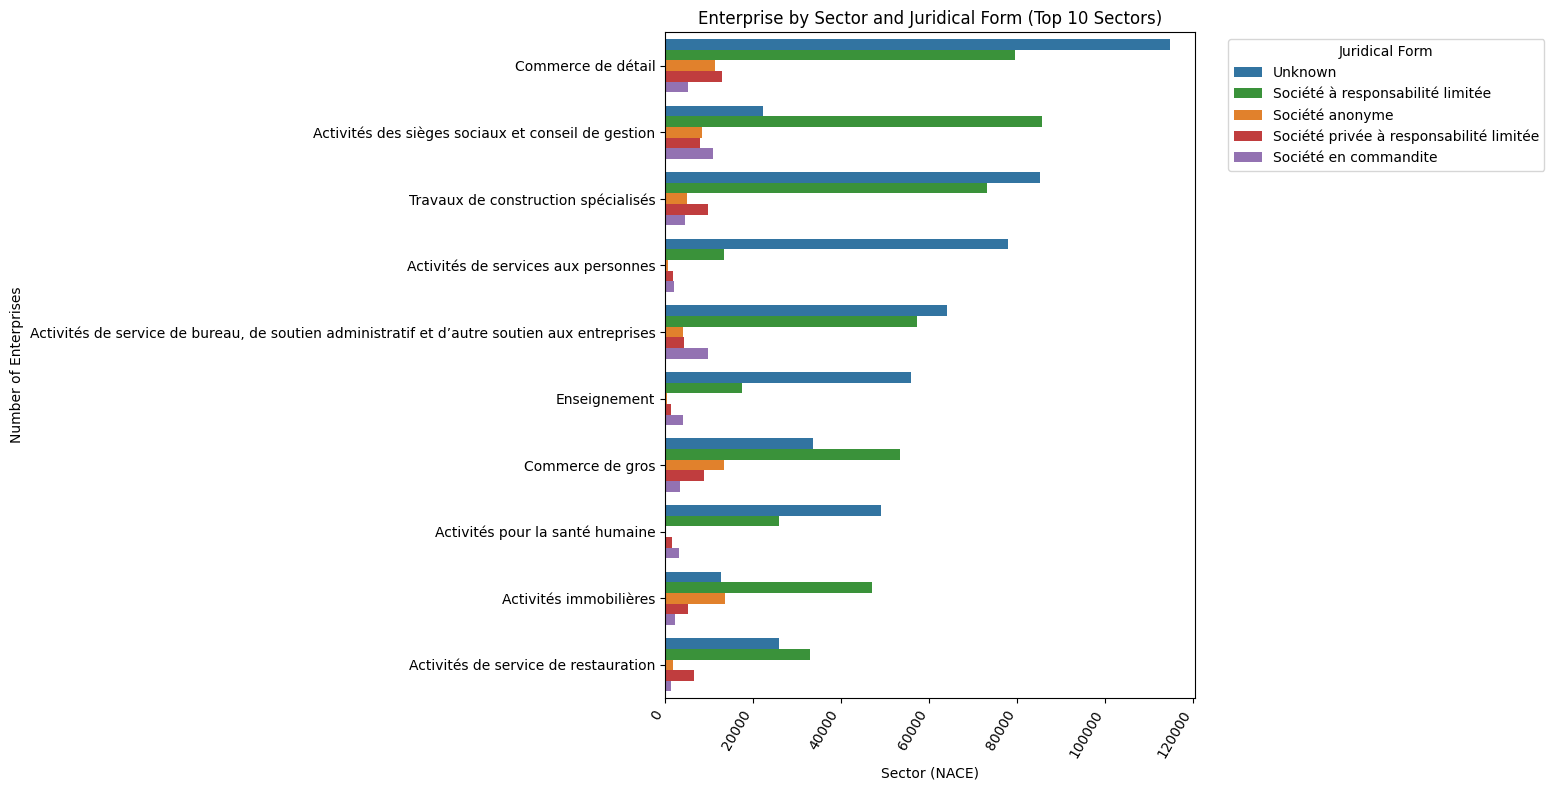

In [101]:
palette = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple']

plt.figure(figsize=(16, 8))

sns.barplot(
    data=filtered_juridique,
    y='NaceDescription_FR',
    x='EnterpriseCount',
    hue='Description',
    palette = palette
)

plt.title('Enterprise by Sector and Juridical Form (Top 10 Sectors)')
plt.xticks(rotation=60, ha='right')
plt.ylabel("Number of Enterprises")
plt.xlabel("Sector (NACE)")
plt.legend(title="Juridical Form", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Distribution by years

In [56]:
nace_codes = pd.read_csv('data/NACCodes-double-digits-sector.csv')
nace_codes

,Code,Description
0,1,"Culture et production animale, chasse et servi..."
1,2,Sylviculture et exploitation forestière
2,3,Pêche et aquaculture
3,5,Extraction de houille et de lignite
4,6,Extraction d’hydrocarbures
...,...,...
82,95,"Réparation et entretien d’ordinateurs, de bien..."
83,96,Activités de services aux personnes
84,97,Activités des ménages en tant qu’employeurs de...
85,98,Activités indifférenciées des ménages en tant ...


In [55]:
years = pd.read_csv('data/enterprises-by-year-range-by-sector.csv')
years

,NaceCodeGroup,CreationYear,EntityCount
0,47,After 2010,163231
1,43,After 2010,136545
2,82,After 2010,129734
3,70,After 2010,111666
4,85,After 2010,77930
...,...,...,...
453,80,Before 1920,1
454,89,1920-1939,1
455,89,Before 1920,1
456,91,Before 1920,1


In [57]:
years_labeled = years.merge(
    nace_codes,
    left_on='NaceCodeGroup',
    right_on='Code',
    how='left'  # keeps all rows from df_counts
)

In [58]:
years_labeled 

,NaceCodeGroup,CreationYear,EntityCount,Code,Description
0,47,After 2010,163231,47.0,Commerce de détail
1,43,After 2010,136545,43.0,Travaux de construction spécialisés
2,82,After 2010,129734,82.0,"Activités de service de bureau, de soutien adm..."
3,70,After 2010,111666,70.0,Activités des sièges sociaux et conseil de ges...
4,85,After 2010,77930,85.0,Enseignement
...,...,...,...,...,...
453,80,Before 1920,1,80.0,Activités d’investigation et de sécurité
454,89,1920-1939,1,NaN,NaN
455,89,Before 1920,1,NaN,NaN
456,91,Before 1920,1,91.0,"Bibliothèques, archives, musées et autres acti..."


In [66]:
print(years_labeled['CreationYear'].unique())

['After 2010' '1990-2009' '1960-1989' '1940-1959' '1920-1939'
 'Before 1920']


In [ ]:
creation_order = ['Before 1920', '1920-1939', '1940-1959', '1960-1989', '1990-2009', 'After 2010']

first_three = creation_order[:3]
last_three = creation_order[3:]

top_sectors = years_labeled .groupby('NaceCodeGroup')['EntityCount'].sum().nlargest(10).index
years_filtered = years_labeled[years_labeled ['NaceCodeGroup'].isin(top_sectors)]

years_first = years_filtered[years_filtered['CreationYear'].isin(first_three)]
years_last = years_filtered[years_filtered['CreationYear'].isin(last_three)]

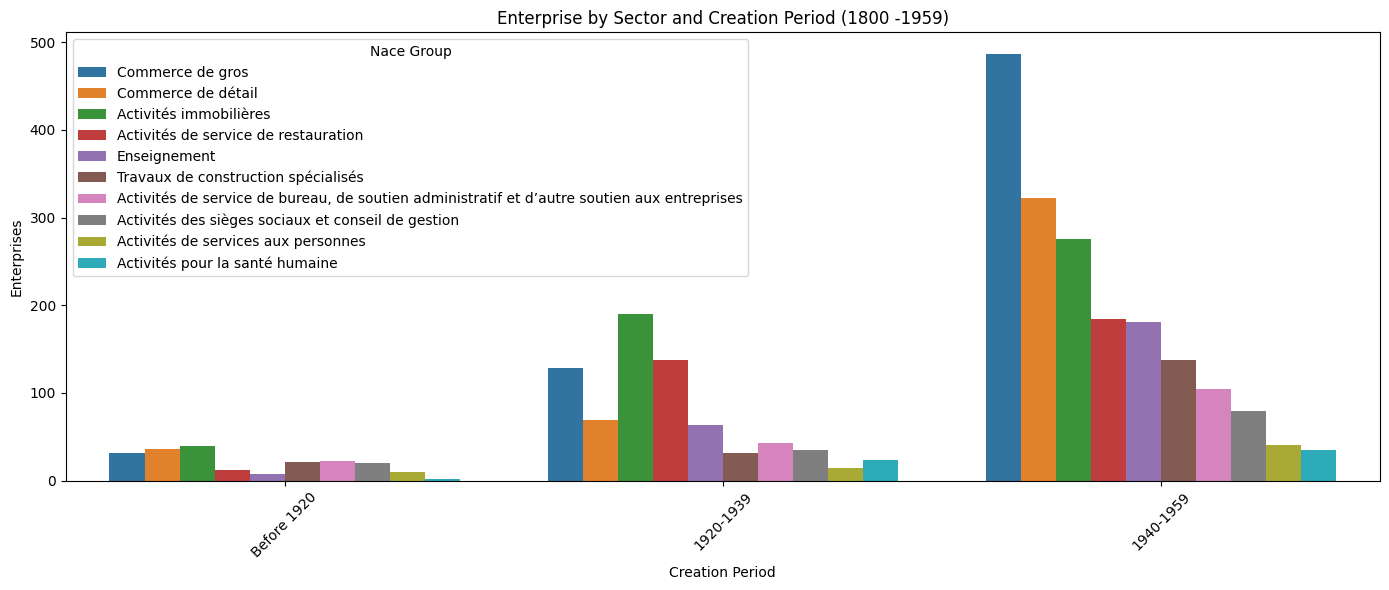

In [78]:

# Plot 1
plt.figure(figsize=(14, 6))
sns.barplot(
    data=years_first,
    x='CreationYear',
    y='EntityCount',
    hue='Description',
    order=first_three,
    palette='tab10'
)

plt.title("Enterprise by Sector and Creation Period (1800 -1959)")
plt.xlabel("Creation Period")
plt.ylabel("Enterprises")
plt.legend(title="Nace Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


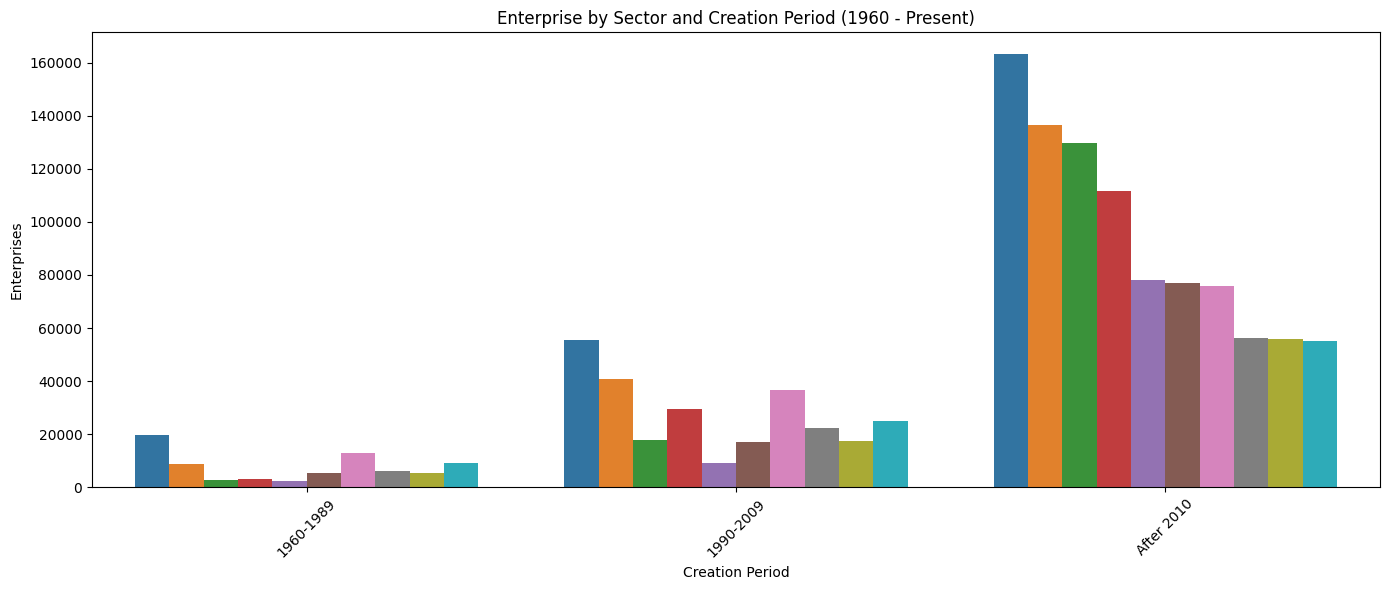

In [79]:
# Plot 2
plt.figure(figsize=(14, 6))
sns.barplot(
    data=years_last,
    x='CreationYear',
    y='EntityCount',
    hue='Description',
    order=last_three,
    palette='tab10'
)

plt.title("Enterprise by Sector and Creation Period (1960 - Present)")
plt.xlabel("Creation Period")
plt.ylabel("Enterprises")
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()